In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso

In [49]:
df = pd.read_csv(r"C:/Users/aliay/OneDrive/Desktop/Github-zone/Machine_Learning/data/data.csv")
df.head()

,x,y
0,0.000000,-4.994472
1,5.172414,-4.990731
2,10.344828,-4.984462
3,15.517241,-4.973965
4,20.689655,-4.956405


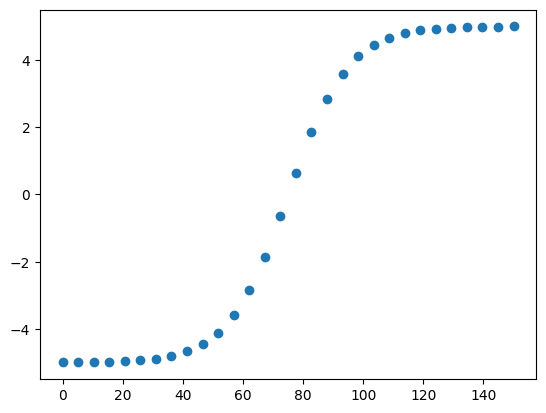

In [50]:
plt.scatter(df['x'],df['y'])

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(df['x'].values.reshape(-1,1),df['y'])

LinearRegression()

In [53]:
print(lr.intercept_)
# slope
print(lr.coef_)

-6.860493660473974
[0.09147325]


In [54]:
preds = lr.predict(df['x'].values.reshape(-1,1))

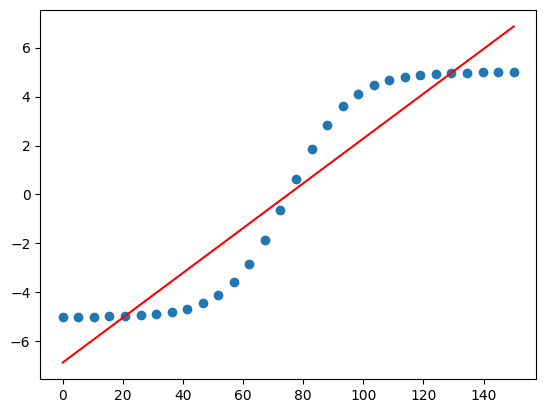

In [55]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],preds,color='r')

In [56]:
mean_squared_error(df['y'],preds)

1.7902198833254446

In [57]:
mean_absolute_error(df['y'],preds)

1.1850371896009213

In [58]:
r2_score(df['y'],preds)

0.9035493661591488

In [59]:
x = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)

degree :  0
after poly :  0.0


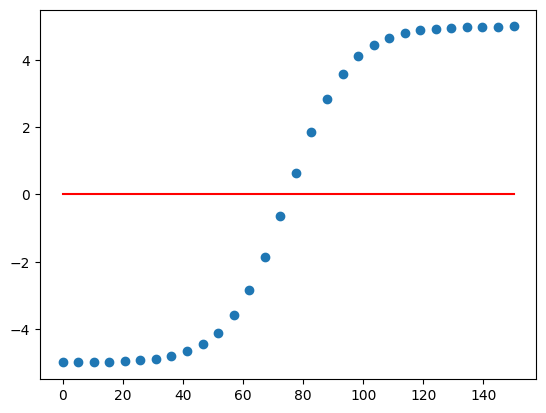

degree :  1
after poly :  0.9035493661591488


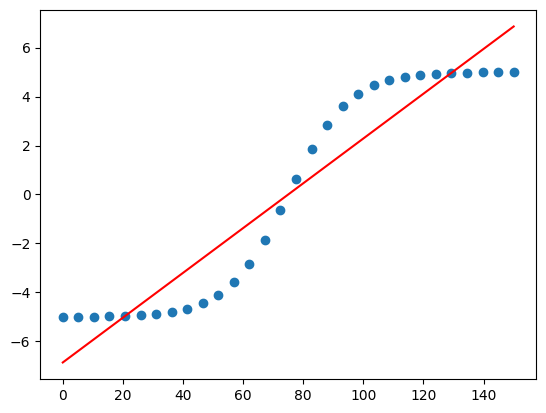

degree :  2
after poly :  0.9035493661591488


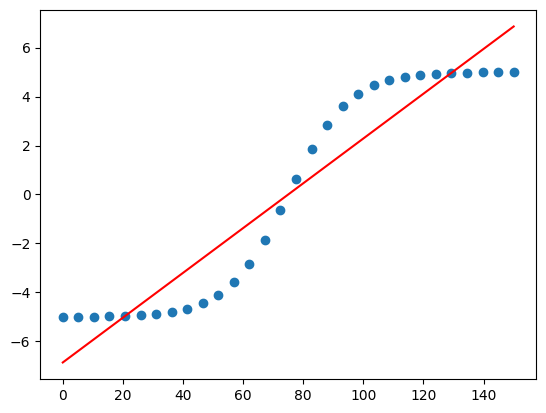

degree :  3
after poly :  0.9826772555715941


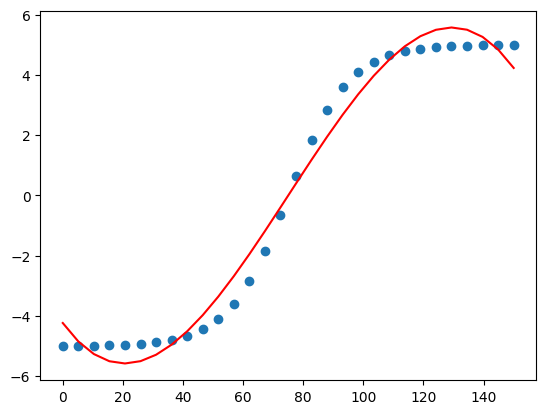

degree :  4
after poly :  0.9826772555715941


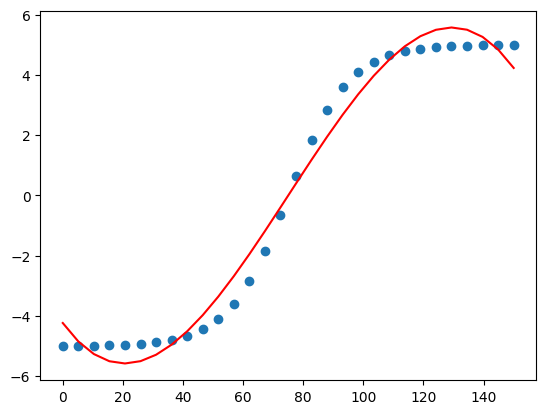

degree :  5
after poly :  0.9966269147178564


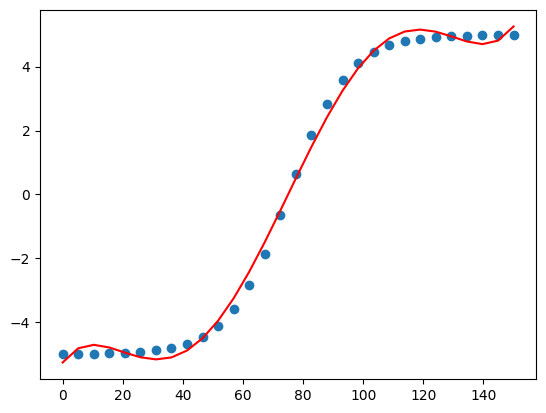

degree :  6
after poly :  0.9966269147178566


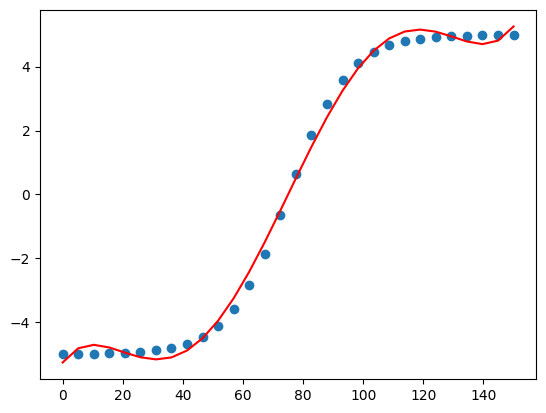

degree :  7
after poly :  0.999344802161243


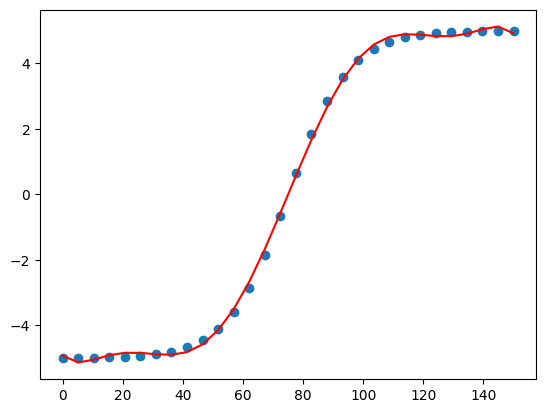

degree :  8
after poly :  0.9993448021612428


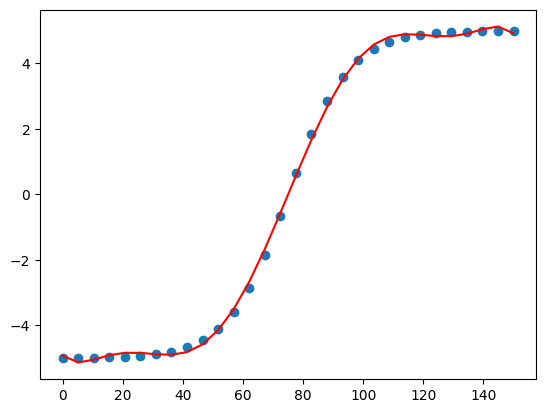

degree :  9
after poly :  0.9998763141387969


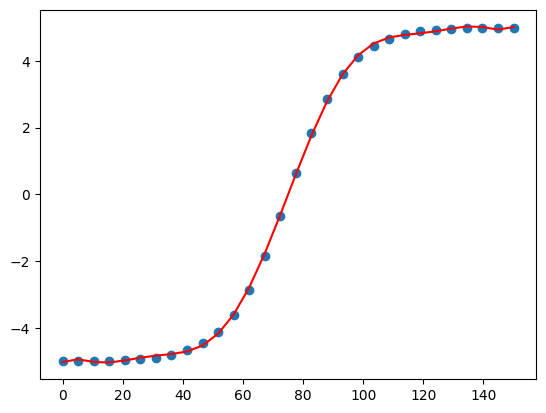

degree :  10
after poly :  0.9998763141387971


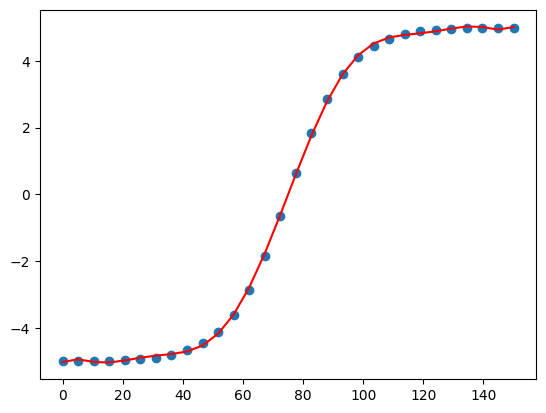

degree :  11
after poly :  0.999977647003335


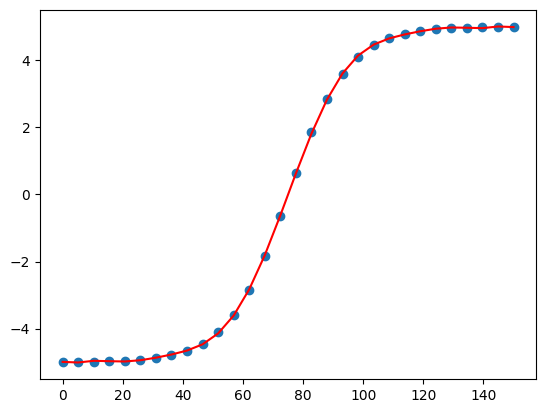

degree :  12
after poly :  0.9999776470032712


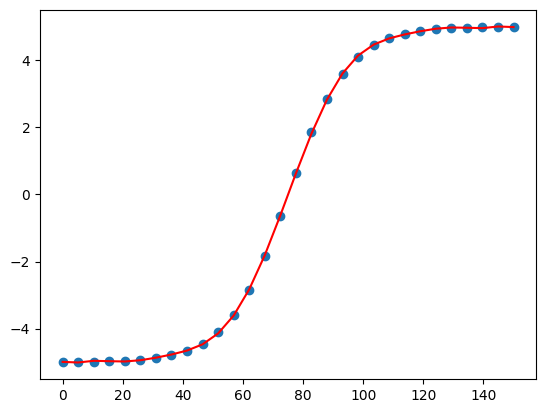

degree :  13
after poly :  0.9999961878432762


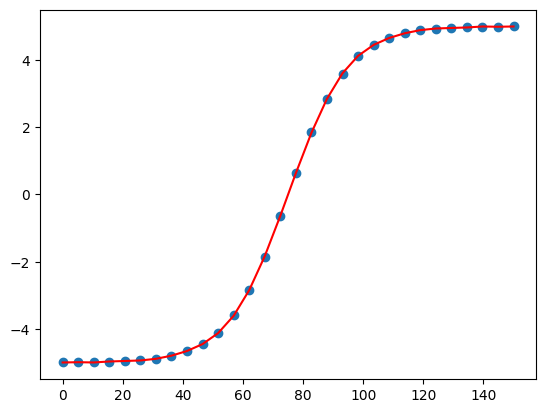

degree :  14
after poly :  0.9999961878430943


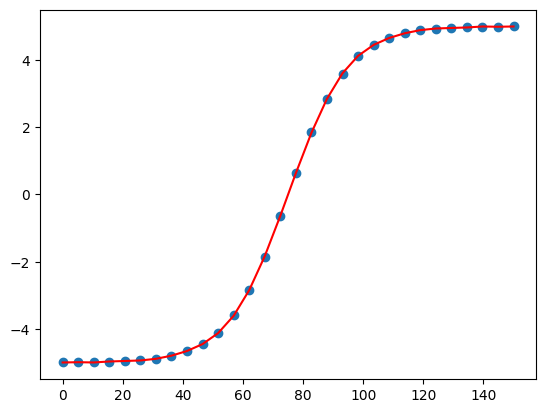

In [60]:
for i in range(15):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x)
    scl = StandardScaler()
    scl_x = scl.fit_transform(x_poly)
    lr.fit(scl_x,y)
    preds_poly = lr.predict(scl_x)
    print("degree : ", i )
    print("after poly : ",r2_score(y,preds_poly))
    plt.scatter(x,y)
    plt.plot(x,preds_poly,color='red')
    plt.show()


degree :  14
after poly :  0.9905646288380672


c:\Users\aliay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+00, tolerance: 5.568e-02
  model = cd_fast.enet_coordinate_descent(


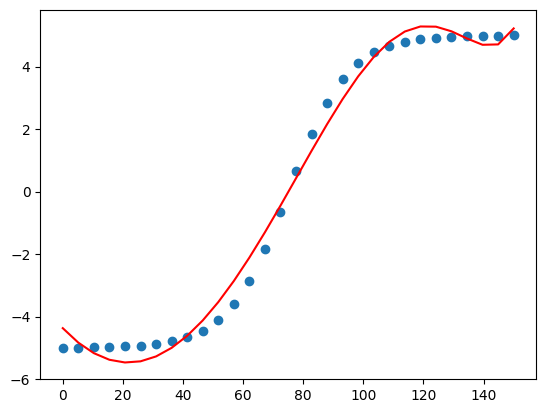

c:\Users\aliay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+00, tolerance: 5.568e-02
  model = cd_fast.enet_coordinate_descent(


degree :  14
after poly :  0.9905634709115636


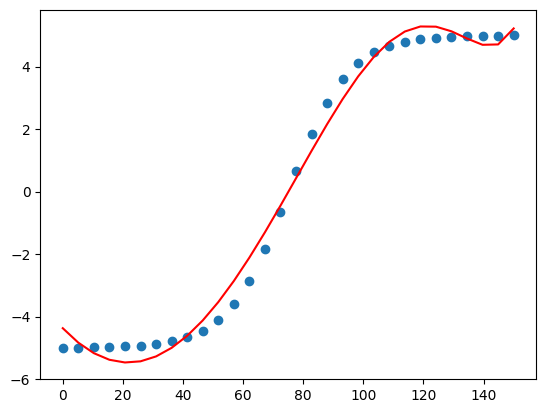

c:\Users\aliay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.366e+00, tolerance: 5.568e-02
  model = cd_fast.enet_coordinate_descent(


degree :  14
after poly :  0.9905512373324905


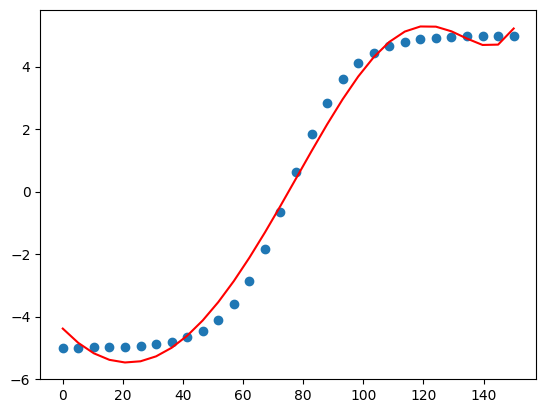

c:\Users\aliay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.806e-01, tolerance: 5.568e-02
  model = cd_fast.enet_coordinate_descent(


degree :  14
after poly :  0.9903456118025209


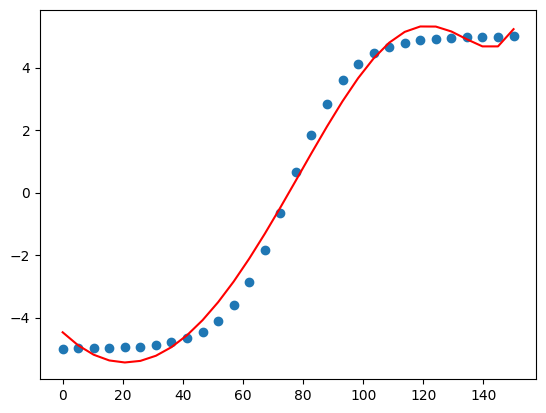

c:\Users\aliay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.905e-01, tolerance: 5.568e-02
  model = cd_fast.enet_coordinate_descent(


degree :  14
after poly :  0.9846191985115154


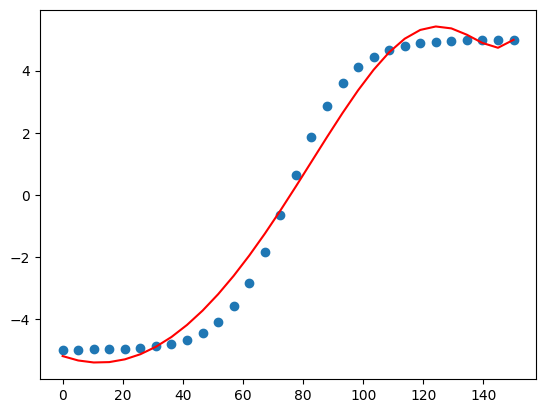

degree :  14
after poly :  0.9470070812081832


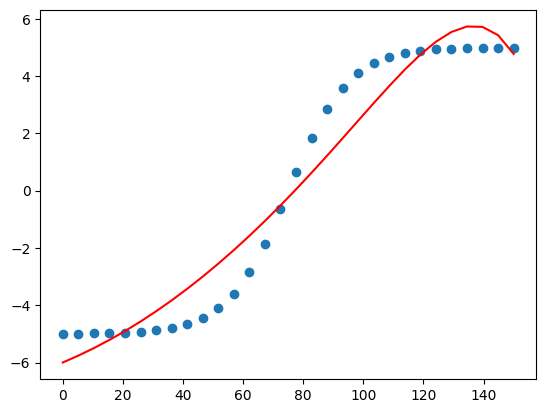

c:\Users\aliay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\aliay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\aliay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.627e+00, tolerance: 5.568e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers i

degree :  14
after poly :  0.9905647567759306


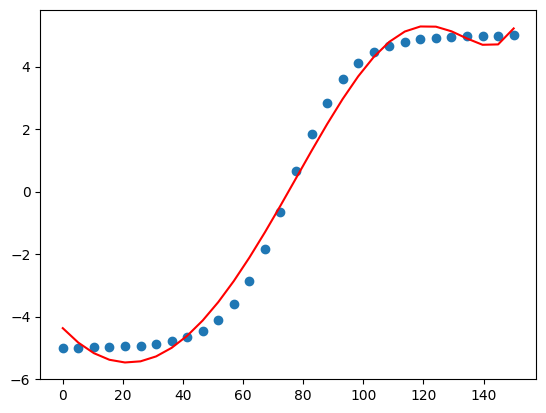

degree :  14
after poly :  0.8496729486647303


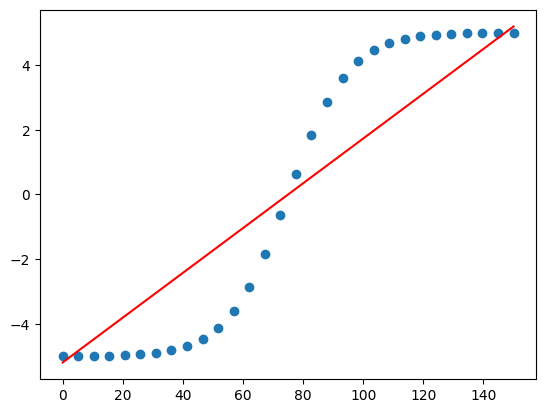

degree :  14
after poly :  0.6880436961814743


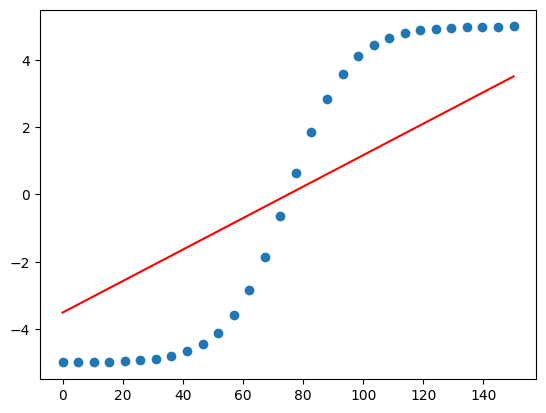

degree :  14
after poly :  0.0


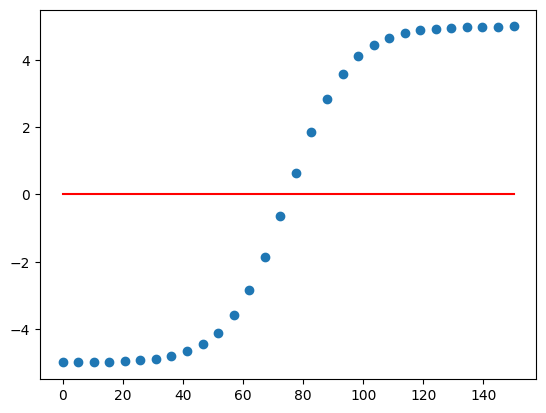

In [62]:
for alpha in [.000001,.00001,.0001,.001,.01,.1,0,1,2,10]:
    poly = PolynomialFeatures(degree=15)
    x_poly = poly.fit_transform(x)
    scl = StandardScaler()
    scl_x = scl.fit_transform(x_poly)
    lr_lasso = Lasso(alpha=alpha).fit(scl_x,y)
    preds_poly = lr_lasso.predict(scl_x)
    print("degree : ", i )
    print("after poly : ",r2_score(y,preds_poly))
    plt.scatter(x,y)
    plt.plot(x,preds_poly,color='red')
    plt.show()


degree :  14
after poly :  0.9995323837326906


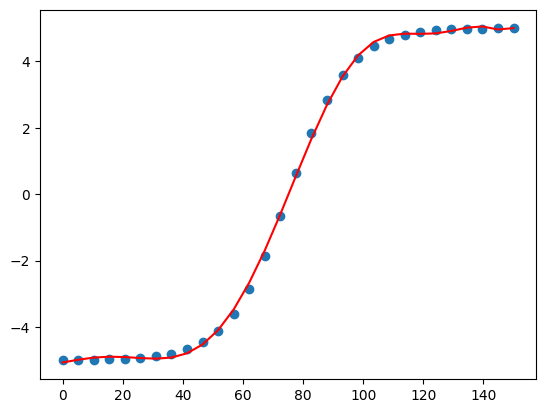

degree :  14
after poly :  0.9988703420581052


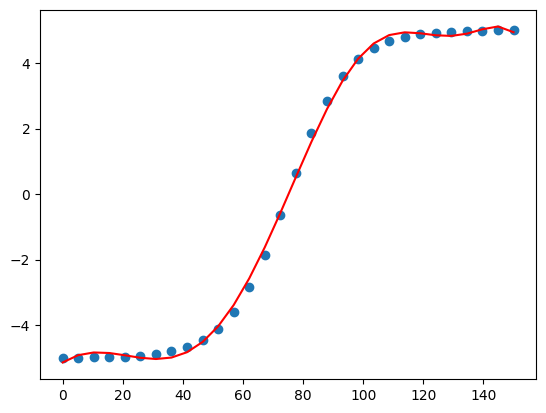

degree :  14
after poly :  0.9980295062611899


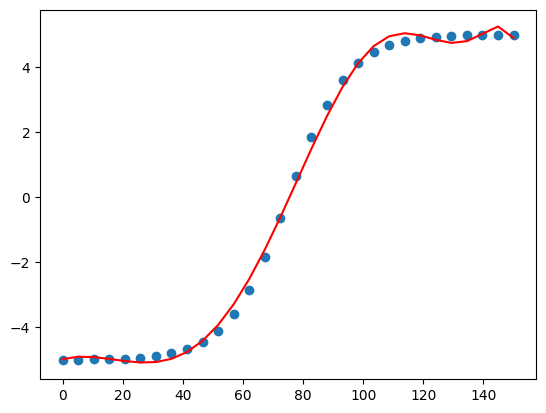

degree :  14
after poly :  0.9962227253707671


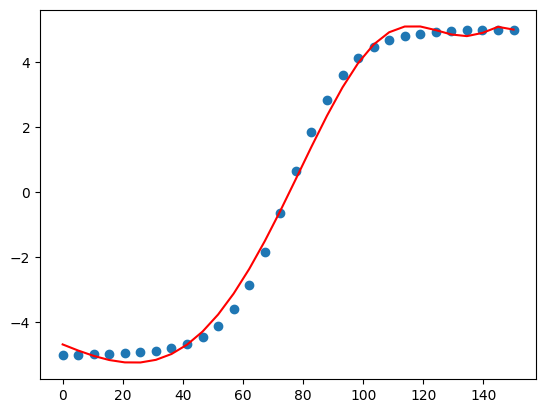

degree :  14
after poly :  0.9920316090067569


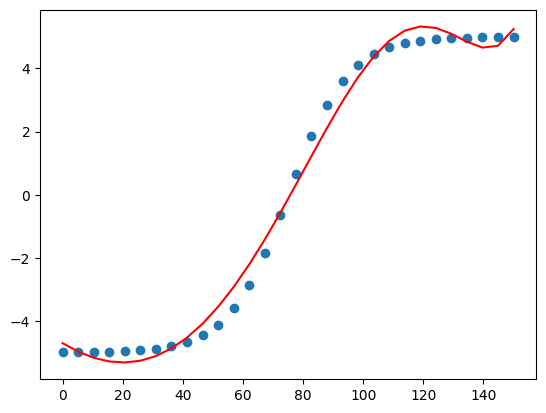

degree :  14
after poly :  0.9830916771731214


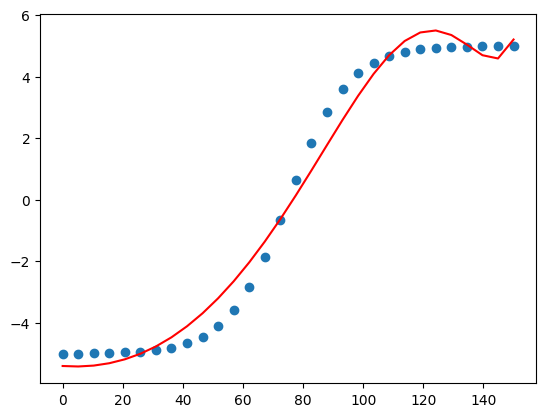

degree :  14
after poly :  0.9999993970967662


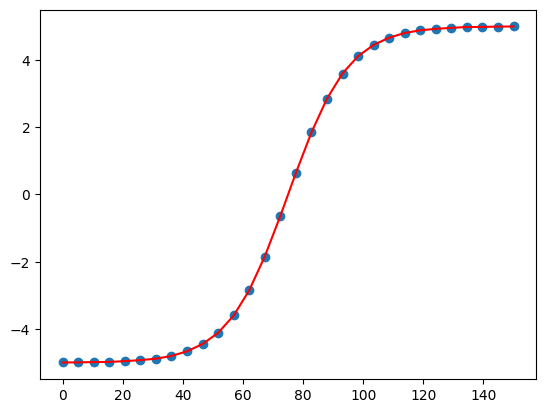

degree :  14
after poly :  0.9581194226285015


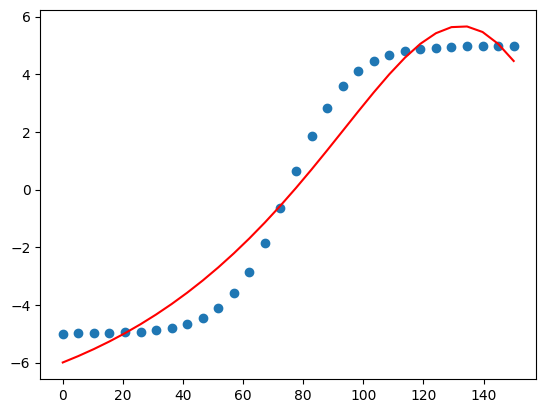

degree :  14
after poly :  0.9484672928558328


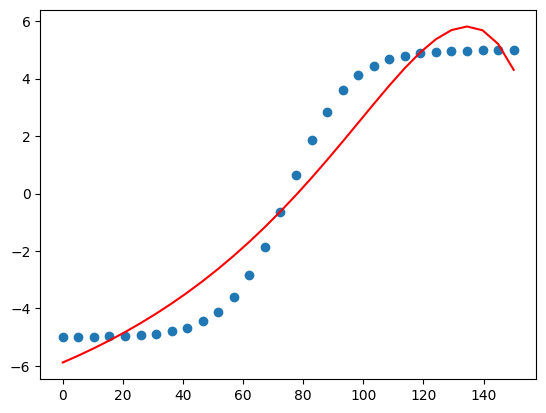

degree :  14
after poly :  0.9064331746344876


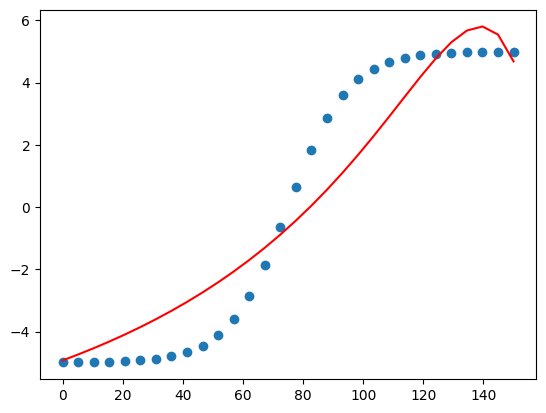

In [64]:
for alpha in [.000001,.00001,.0001,.001,.01,.1,0,1,2,10]:
    poly = PolynomialFeatures(degree=15)
    x_poly = poly.fit_transform(x)
    scl = StandardScaler()
    scl_x = scl.fit_transform(x_poly)
    lr_Ridge = Ridge(alpha=alpha).fit(scl_x,y)
    preds_poly = lr_Ridge.predict(scl_x)
    print("degree : ", i )
    print("after poly : ",r2_score(y,preds_poly))
    plt.scatter(x,y)
    plt.plot(x,preds_poly,color='red')
    plt.show()